In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.environment import Tweezer
from src.utils.memory import Memory
from src.models import DDPG
from src.models.RBF import rbfprojector
from time import time
from tqdm import tqdm

/home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [11]:
def state_value_action_critic(env, 
                              sigma=1, 
                              gamma=0.99, 
                              alpha=0.2, 
                              beta=0.01, 
                              episodes=200, 
                              steps=100, 
                              render_step=0, 
                              rate = 0.99,
                              plot=True
                             ):
    s = env.reset()
    feature = rbfprojector(21, 0.25)
    w = np.zeros(len(feature([0, 0, 0])))
    theta = np.random.rand(len(feature([0, 0, 0])))
    start = time()
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        rewards, actions, states = [], [], []
        for t in range(steps):
            # Compute phi_s and pi_s_theta
            phi_s = feature(s)
            pi_s_theta = np.dot(theta, phi_s)
            # Take an action and apply to the system
            a = np.random.normal(pi_s_theta, scale=sigma, size=None)
            actions.append(a)
            states.append(s)
            sP, r, done, _ = env.step(a)
            # Compute phi_sP
            phi_sP = feature(sP)
            # Compute delta and update w and theta
            delta = r + gamma*np.dot(w, phi_sP) - np.dot(w, phi_s)
            w = w + alpha*delta*phi_s
            theta = theta + beta*(a-pi_s_theta)*phi_s*delta
            total_r+=r
            s = sP
        actions = np.array(actions)
        states = np.array(states)
        rewards.append(total_r) 
        sigma = sigma*rate
    end = time()
    env.close()
#    return theta, w, np.array(rewards), end-start
    return states, actions

In [12]:
#theta, w, rewards, time_consumption = state_value_action_critic(Tweezer())
states, actions  = state_value_action_critic(Tweezer())

  3%|▎         | 6/200 [00:00<00:03, 51.18it/s]

-2.390253173476406e+26
-8.063738009470638e+26
-7.500792948395817e+26
-1.5893589692835473e+26
-4.096876533679637e+26
-7.675914199493307e+26
-5.1458718087204196e+26
-4.543980909606853e+26
-5.390063296427713e+26
-5.766337357391189e+26
-2.760741379710913e+26


  9%|▉         | 18/200 [00:00<00:03, 51.09it/s]

-2.590436037528591e+27
-1.1067464524921263e+26
-1.0191163710484053e+27
-8.751136533066481e+26
-4.964552845205759e+26
-4.7370321806077114e+26
-1.0502881457333154e+26
-1.4636278423182077e+27
-2.343815164577719e+26
-4.325775487182113e+26
-2.622334040415628e+26


 15%|█▌        | 30/200 [00:00<00:03, 53.55it/s]

-7.986003733039735e+26
-3.559685802800105e+26
-8.1644099622533e+26
-7.259237350993906e+26
-2.7631771265509738e+26
-4.6330703277505163e+26
-1.3778530488486252e+26
-5.215114935679037e+26
-6.920098867011037e+26
-3.2923475379629896e+26
-1.1114425116663986e+26
-4.9541485732773616e+26


 21%|██        | 42/200 [00:00<00:02, 54.11it/s]

-1.6122854628620333e+26
-3.953054097730125e+26
-4.244670387865267e+26
-3.7342560282740194e+26
-1.1378188535103767e+26
-1.5909800647261945e+26
-1.3033076178465456e+26
-7.241456335854061e+26
-8.403966551864477e+25
-4.784506548100336e+26
-1.4054335290312359e+26


 27%|██▋       | 54/200 [00:01<00:02, 53.72it/s]

-1.2589365511396554e+26
-4.735952705987704e+26
-1.735937430376632e+26
-2.9525449719482872e+26
-2.993034535430233e+26
-2.0837581905288433e+26
-6.479489170128277e+25
-4.320716987099891e+26
-4.0004401018016425e+26
-1.3692721245227133e+27
-2.8372527007009014e+26


 33%|███▎      | 66/200 [00:01<00:02, 52.46it/s]

-3.985035712325604e+26
-5.080144741823716e+25
-8.398305294097875e+25
-1.6516060050906692e+26
-3.991951111173237e+25
-6.270696585265072e+26
-3.779229809679986e+26
-1.3779621001687567e+26
-3.0698076336663663e+26
-8.198425956698378e+25
-5.94949629252098e+26


 39%|███▉      | 78/200 [00:01<00:02, 52.51it/s]

-2.0073484725302425e+26
-1.495983777985355e+26
-2.9554107170838308e+26
-5.22133272082873e+25
-2.767438116753065e+26
-9.712002169424008e+25
-3.953680344256431e+26
-1.1187916447472195e+26
-2.6748054988498115e+26
-1.9134510333933494e+26
-1.892309368317575e+26


 42%|████▏     | 84/200 [00:01<00:02, 52.63it/s]

-8.36551304800961e+25
-3.19318416802948e+26
-1.8907043037556164e+26
-2.5990006230681687e+26
-5.488821936636762e+26
-2.809624927783912e+26
-2.0377499195235542e+26
-2.132676872134706e+26
-3.774381530824311e+26
-3.440953675386114e+26
-3.671199799968808e+25


 48%|████▊     | 96/200 [00:01<00:01, 53.56it/s]

-1.3189802373687508e+26
-2.0707548343105785e+26
-1.6703803321399278e+26
-2.410944923024555e+26
-2.1689401425613225e+26
-1.863417180337658e+26
-3.153781145821481e+26
-1.6055699086339183e+26
-6.022827968731389e+25
-2.3848703055107023e+26
-1.99822330097191e+26


 54%|█████▍    | 108/200 [00:02<00:01, 53.52it/s]

-2.0771370202257705e+26
-4.137693582222934e+26
-1.2152287809823328e+26
-2.2831196261266e+26
-5.53109589860274e+25
-2.2428456230851136e+26
-2.4444477516278797e+26
-1.3487077844756867e+26
-1.9402527579751418e+26
-1.0470141206372147e+26
-2.5822779724607152e+26


 60%|██████    | 120/200 [00:02<00:01, 53.87it/s]

-1.3289492531559147e+26
-3.770659464147714e+26
-2.061352593424206e+26
-2.9179152788800635e+26
-6.349166759513966e+25
-1.8765654661335245e+26
-2.0683034002996663e+26
-1.444777985015692e+26
-3.107052217911479e+26
-2.795096418525375e+26
-1.62542446673826e+26


 66%|██████▌   | 132/200 [00:02<00:01, 54.06it/s]

-1.390257342408235e+26
-1.1036981514195809e+26
-2.092841254781108e+26
-1.7147549792725362e+26
-1.0373705496026304e+26
-4.846556752316744e+25
-2.8234712785884097e+26
-1.6785094344117046e+26
-1.651862007368534e+26
-1.0585532566050446e+26
-1.2437223164514787e+26


 72%|███████▏  | 144/200 [00:02<00:01, 53.75it/s]

-1.9369231283691743e+26
-2.3130537658487576e+26
-1.733078181640697e+26
-1.028925773704284e+26
-1.3547907042063798e+26
-1.796636325992009e+26
-2.2658057512628945e+26
-2.138192615894252e+26
-1.9932131441394888e+26
-2.0146766007638357e+26
-1.6656815884570185e+26


 78%|███████▊  | 156/200 [00:02<00:00, 54.50it/s]

-8.128679803890109e+25
-1.4433635550577868e+26
-2.9823115896267066e+26
-7.933336983833539e+25
-1.5419206350517625e+26
-6.877973224683298e+25
-1.3355794888213372e+26
-1.2733125348093304e+26
-9.074814578051943e+25
-1.0802171066634773e+26
-1.7627083242941296e+26
-1.4589256933441224e+26


 81%|████████  | 162/200 [00:03<00:00, 54.17it/s]

-1.1232551822772353e+26
-1.6682545840334477e+26
-1.3904244523065169e+26
-2.172910335146167e+26
-1.5449520769449978e+26
-9.818432158092703e+25
-1.8268735511223656e+26
-1.1375665009017784e+26
-2.090057384179194e+26
-2.1000384949558725e+26
-2.1435409014592116e+26


 87%|████████▋ | 174/200 [00:03<00:00, 53.78it/s]

-1.7191994277606266e+26
-1.4745570584982366e+26
-1.9291077180223733e+26
-8.235158399218297e+25
-1.4576075811191771e+26
-1.1092821870038924e+26
-1.343530677157232e+26
-1.516474006314216e+26
-9.91177529984189e+25
-1.5543887085624407e+26
-1.8052811090187255e+26


 93%|█████████▎| 186/200 [00:03<00:00, 52.98it/s]

-1.7499563572520346e+26
-1.5132150702988092e+26
-1.0163865145524384e+26
-1.328916150242481e+26
-1.0462149580367901e+26
-1.688415210828567e+26
-1.5639497598367072e+26
-1.693169152751999e+26
-1.7679531178277943e+26
-1.935893884865445e+26
-2.0177178514642706e+26


100%|██████████| 200/200 [00:03<00:00, 53.30it/s]

-1.3250777497492255e+26
-1.0550117178503905e+26
-1.6418298378566136e+26
-1.2814926948851065e+26
-1.2888054006662565e+26
-1.663199246935746e+26
-1.610528415102669e+26
-1.5032764634159967e+26
-8.485561772234647e+25
-1.1089096896823559e+26
-1.1473557749922638e+26


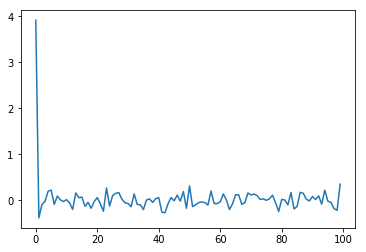

In [13]:
plt.plot(actions)
plt.show()

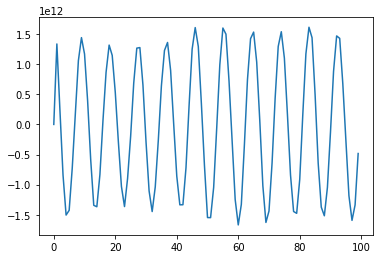

In [14]:
plt.plot(states[:,1])
plt.show()

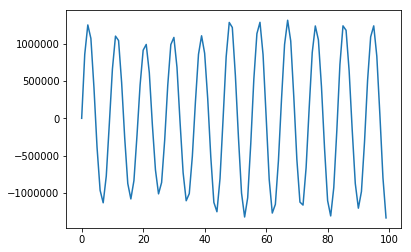

In [15]:
plt.plot(states[:,0])
plt.show()

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
#Picking only the first 100 points to have a similar graphic to the one on ex4.pdf
plt.plot(rewards[:100], linewidth=2.5)
plt.title("Reward during simulation State Value Action Critic")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

NameError: name 'rewards' is not defined

<Figure size 1080x288 with 0 Axes>

### Exercise 2.4 

Measure the performance in three ways:

* rise time: how many episodes does it take for the learning to converge? Use the point at which the episode reward is consistently above -500.
* end performance: the reward obtained after training. Use a separate run of 100 episodes where exploration and learning is disabled, and average the episode rewards.
* computation time: how long it took to train 100 episodes. Use time.time().

Run the training a few times and average the results to get statistically meaninful information.

#### Answer

Implementation in the cells bellow

In [50]:
# Creating function to act on the system with no learning and exploration.

def end_perf_state_value_action_critic(env, 
                                       theta,
                                       episodes=200, 
                                       steps=1000, 
                                       render_step=0):
    s = env.reset()
    # Create feature as a rbfprojector
    feature = rbfprojector(21, 0.25)
    rewards = []
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        for t in range(steps):
            # Compute phi_s and pi_s_theta
            phi_s = feature(s)
            pi_s_theta = np.dot(theta, phi_s)
            # Take an action and apply to the system
            a = pi_s_theta
            sP, r, done, _ = env.step(a)
            total_r+=r
            if render_step and not t%render_step:
                env.render()
            if done:
                break
            s = sP
        rewards.append(total_r) 
    return np.array(rewards) 

In [62]:
rewards = end_perf_state_value_action_critic(Pendulum(), theta)

100%|██████████| 200/200 [00:10<00:00, 19.98it/s]


In [131]:
# Running 5 different tests on the algorithm to evaluate the metrics

num_tests = 5
environment = Pendulum()
perfs, trains, training_time = [], [], []
for i in range(num_tests):
    theta, w, train_reward, time_consumption = state_value_action_critic(environment, plot=False)
    perf_reward = end_perf_state_value_action_critic(environment, theta )
    trains.append(train_reward)
    perfs.append(perf_reward)
    training_time.append(time_consumption)

100%|██████████| 100/100 [00:04<00:00, 22.10it/s]


In [133]:
number_episodes = np.array(list(map(lambda x: np.argwhere(x>-500)[3,0], trains)))
number_episodes.mean(), np.median(number_episodes), number_episodes.std()

(16.666666666666668, 12.0, 8.055363982396383)

In [134]:
end_performances = np.array(list(map(lambda x: x.mean(), perf_reward)))
end_performances.mean(), np.median(end_performances), end_performances.std()

(-210.6968780089007, -226.98652554165182, 146.8189717158916)

In [135]:
training_time = np.array(training_time)
training_time.mean(), np.median(training_time), training_time.std()

(8.37503080368042, 8.336115837097168, 0.3397824343631149)

#### Results

  | Metric | Mean Value | Median Value | Standard Deviation |
   |---|---|---|---|
   | Rise Time |  16.666| 12| 8.055|
   | End Performance| -210.6968 | -266.986 | 146.818 | 
   | Computation Time (s)| 8.3750 | 8.336 | 0.3397|

## 3. Deep Deterministic Policy Gradient

Now we move to a nonlinear representation, with the required stabilization mechanisms (replay memory, target network). The Deep Deterministic Policy Gradient algorithm estimates the value function (critic) in the same way as Deep Q learning you implemented in Exercise 3, but additionally trains a policy (actor) using the gradient

$∇\theta J_r(\theta)= E_{\pi \theta} \{\nabla_\theta Q^{\pi\theta} (s,\pi(s;\theta))\}$

that is, moving the policy parameters such that they maximize the $Q$ function.

### Exercise 3.1.

Implement DDPG. Use `DDPG.critic` to read the value function and `DDPG.actor` to read the policy. Note that the DDPG.train function already handles the training of the actor using the gradient in Equation 1. Update the target network every $200$ steps. 

Note that the actor network’s output is limited to $[−1, 1]$, while the pen- dulum’s actions are in the range [−2,2]. To make sure the results are comparable, multiply the actor’s value by $2$ before passing it to `env.step`, and halve the noise.

After training, plot the learning curve and approximators. For the latter, use `env.plotnetwork(ddpg)`. The results should be similar to Figure 3.

#### Answer:

Implementation in the cells below.

In [104]:
def ddpg_loop(env, 
              sigma=1, 
              gamma=0.99,
              episodes=200, 
              steps=1000, 
              render_step=0,
              memory_len_min=1000,
              batch_size=256,
              train_step_amount=200,
              rate=0.99,
              plot=True):
    # Reset enviroment to get a state
    s = env.reset()
    # Use the state to instatiate DDPG for base and target networks, and also for memory
    ddpg = DDPG(s.shape[0])
    target_net = DDPG(s.shape[0])
    memory = Memory(s.shape[0], 1)
    rewards = []
    train_steps = 0
    start = time()
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        for t in range(steps):
            # Add to train_step incremetor for target_network to get weights from ddpg
            train_steps+=1
            # Take action using ddpg.actor as mean and use half sigma for noise 
            a = np.random.normal(ddpg.actor(s), 0.5*sigma)
            # Multiply action by 2 since output of the network is limited
            sP, r, done, info = env.step(2*a)
            # Add info to memory
            memory.add(s, a, r, sP, done)
            total_r+=r
            # If at least 1000 transitions in memory, sample the memory
            if memory.__len__() > memory_len_min:
                s_mem, a_mem, r_mem, sP_mem, done_mem = memory.sample(batch_size)
                # Compute target using target network
                y = r_mem + gamma*target_net.critic(sP_mem, a_mem) * abs(done_mem - 1)
                ddpg.train(s_mem, a_mem, y)
                # After a certain number of timesteps, copy weights to target network
                if (train_steps >= train_step_amount):
                    target_net <<= ddpg
                    train_steps = 0
            if done:
                break
            s = sP
        rewards.append(total_r) 
        sigma = sigma*rate
    end = time()
    if plot:
        env.plotnetwork(ddpg)
    env.close()
    return ddpg, rewards, end-start

100%|██████████| 200/200 [08:27<00:00,  2.54s/it]


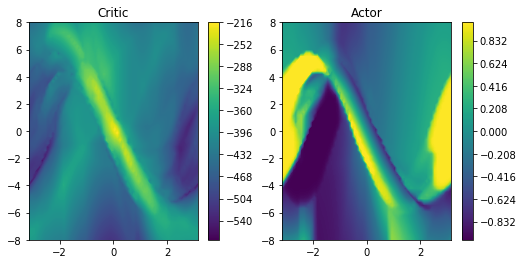

In [96]:
rewards, ddpg, _ = ddpg_loop(Pendulum())

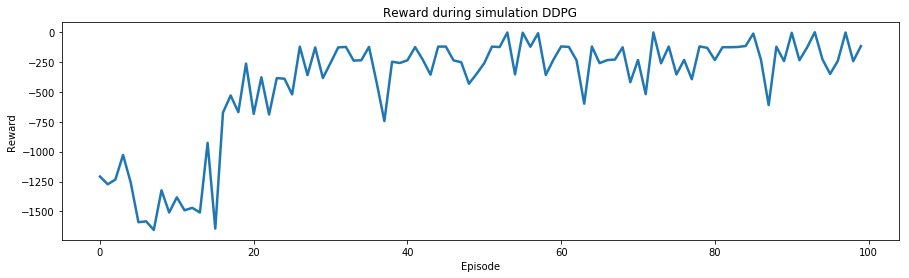

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
#Picking only the first 100 points to have a similar graphic to the one on ex4.pdf
plt.plot(rewards[:100], linewidth=2.5)
plt.title("Reward during simulation DDPG")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Exercise 3.2.

Measure the same statistics as for linear state-value actor-critic, and compare the results. Is it what you expected? Explain.

In [99]:
# Creating function to act on the system with no learning and exploration.

def end_perf_ddpg(env, 
                  ddpg,
                  episodes=200, 
                  steps=1000, 
                  render_step=0):
    s = env.reset()
    rewards = []
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        for t in range(steps):
            # Take an action and apply to the system
            a = ddpg.actor(s)
            sP, r, done, _ = env.step(a)
            total_r+=r
            if render_step and not t%render_step:
                env.render()
            if done:
                break
            s = sP
        rewards.append(total_r) 
    return np.array(rewards) 

In [101]:
# Testing function
reward = end_perf_ddpg(environment, ddpg)

100%|██████████| 200/200 [01:38<00:00,  2.03it/s]


In [106]:
# Running 5 different tests on the algorithm to evaluate the metrics with 100 episodes to consume less time

num_tests = 5
environment = Pendulum()
perfs, trains, training_time = [], [], []
for i in range(num_tests):
    ddpg, train_reward, time_consumption = ddpg_loop(environment, episodes=100, plot=False)
    perf_reward = end_perf_ddpg(environment, ddpg, episodes=100)
    trains.append(train_reward)
    perfs.append(perf_reward)
    training_time.append(time_consumption)

100%|██████████| 100/100 [03:55<00:00,  2.36s/it]


In [126]:
number_episodes = np.array(list(map(lambda x: np.argwhere(np.array(x)>-500)[3][0], trains)))
number_episodes.mean(), np.median(number_episodes), number_episodes.std()

(36.333333333333336, 30.0, 12.657891697365017)

In [127]:
end_performances = np.array(list(map(lambda x: x.mean(), perf_reward)))
end_performances.mean(), np.median(end_performances), end_performances.std()

(-1014.7041650936073, -977.6824290654102, 354.4362118926296)

In [128]:
training_time = np.array(training_time)
training_time.mean(), np.median(training_time), training_time.std()

(530.2096154212952, 479.3325080871582, 117.30870358139215)

#### Results

The results in table also include the ones encountered in the exercise 2.4.

  | Model | Metric | Mean Value | Median Value | Standard Deviation |
   |---|---|---|---|---|
   |SVAC| Rise Time |  16.666| 12| 8.055|
   |SVAC| End Performance| -210.6968 | -266.986 | 146.818 | 
   |SVAC| Computation Time (s)| 8.3750 | 8.336 | 0.3397|
   |DDPG| Rise Time |  36.34| 30.00| 12.657|
   |DDPG| End Performance| -1014.734 | -977.6824 | 354.436 | 
   |DDPG| Computation Time (s)| 530.209 | 479.3324 | 117.308|
   
As expected, the computation time of DDPG is much higher than SVAC, since the neural networks are much more complex and have a bigger of parameters to adjust in its training. It would be expected that the DDPG would be better since its a more complex model, however for the number of trials in all the parameters SVAC achieved better results. With this is possible to conclude that for inverse pendulum problem, the RBF estimator with SVAC is a better option than using DDPG.
   